<a href="https://colab.research.google.com/github/hrush25/IPL_score_prediction/blob/master/Prediction_using_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
data = pd.read_csv('IPL Player Stats - 2016 till 2019.csv')

In [4]:
data.head()

,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,Batting Strike Rate,100,50,0,4s,6s,Bowling Innings,Overs Bowled,Maidens Bowled,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,Delhi Daredevils,CH Morris,IPL 2016,12,7,4,195,82*,65.00,109,178.89,0,1,1,15,12,12,44.0,0,308,13,2/30,23.69,7.00,20.3,0,0,8,0
1,Delhi Daredevils,CH Morris,IPL 2017,9,9,4,154,52*,30.80,94,163.82,0,1,0,15,6,9,31.0,0,240,12,4/26,20.00,7.74,15.5,1,0,5,0
2,Delhi Daredevils,CH Morris,IPL 2018,4,4,3,46,27*,46.00,26,176.92,0,0,0,3,2,4,14.0,0,143,3,2/41,47.66,10.21,28.0,0,0,2,0
3,Delhi Daredevils,JP Duminy,IPL 2016,10,8,3,191,49*,38.20,156,122.43,0,0,0,13,3,5,7.0,0,55,2,1/4,27.50,7.85,21.0,0,0,3,0
4,Delhi Daredevils,Q de Kock,IPL 2016,13,13,1,445,108,37.08,327,136.08,1,3,0,52,13,-,-,-,-,-,-,-,-,-,-,-,2,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Team                  631 non-null    object
 1   Player                631 non-null    object
 2   Tournament            631 non-null    object
 3   Matches               631 non-null    int64 
 4   Batting Innings       631 non-null    object
 5   Not Out               631 non-null    object
 6   Runds Scored          631 non-null    object
 7   Highest Score         631 non-null    object
 8   Batting Average       631 non-null    object
 9   Balls Faced           631 non-null    object
 10  Batting Strike Rate   631 non-null    object
 11  100                   631 non-null    object
 12  50                    631 non-null    object
 13  0                     631 non-null    object
 14  4s                    631 non-null    object
 15  6s                    631 non-null    ob

In [7]:
ipl = pd.read_csv('0y clean data pre ipl.csv')

In [8]:
ipl.head()

,Unnamed: 0,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,run,wickets,truns,y
0,0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0.0,1.0,,,1.0,0.0,1.0,68.0
1,1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,1.0,68.0
2,2,335982,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,,,1.0,0.0,2.0,68.0
3,3,335982,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0
4,4,335982,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0


In [9]:
data['Player'].unique().shape

(268,)

In [10]:
ipl['striker'].unique().shape

(235,)

In [12]:
new_ipl = pd.merge(ipl,data,left_on='striker',right_on='Player')

In [13]:
new_ipl.drop(['wicket_type', 'player_dismissed','Unnamed: 0','match_id'],axis=1,inplace=True)

In [ ]:
new_ipl.head()

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,1,0
1,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,0,0
2,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,8,0
3,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,...,-,-,-,-,-,-,-,-,1,0
4,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,...,-,-,-,-,-,-,-,-,0,0


In [14]:
new_ipl.columns

Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'runs_off_bat', 'extras', 'run', 'wickets',
       'truns', 'y', 'Team', 'Player', 'Tournament', 'Matches',
       'Batting Innings', 'Not Out', 'Runds Scored', 'Highest Score',
       'Batting Average', 'Balls Faced', 'Batting Strike Rate', '100', '50',
       '0', '4s', '6s', 'Bowling Innings', 'Overs Bowled', 'Maidens Bowled',
       'Runs Conceded', 'Wickets Taken', 'Best Bowling Figures',
       'Bowling Average', 'Bowling Economy Rate', 'Bowling Strike Rate',
       '4+ Innings Wickets', '5+ Innings Wickets', 'Catches Taken',
       'Stumpings Made'],
      dtype='object')

### Label encoded all the categorical data

In [16]:
listf = []
for c in new_ipl.columns:
    if new_ipl[c].dtype==object:
        print(c,"->" ,new_ipl[c].dtype)
        listf.append(c)

venue -> object
batting_team -> object
bowling_team -> object
striker -> object
non_striker -> object
bowler -> object
Team -> object
Player -> object
Tournament -> object
Batting Innings -> object
Not Out -> object
Runds Scored -> object
Highest Score -> object
Batting Average -> object
Balls Faced -> object
Batting Strike Rate -> object
100 -> object
50 -> object
0 -> object
4s -> object
6s -> object
Bowling Innings -> object
Overs Bowled -> object
Maidens Bowled -> object
Runs Conceded -> object
Wickets Taken -> object
Best Bowling Figures -> object
Bowling Average -> object
Bowling Economy Rate -> object
Bowling Strike Rate -> object
4+ Innings Wickets -> object
5+ Innings Wickets -> object


In [17]:
def labelEncoding(data):
    dataset = pd.DataFrame(new_ipl)
    feature_dict ={}
    #features={}
    for feature in dataset:
        if dataset[feature].dtype==object:
            le = preprocessing.LabelEncoder()
            fs = dataset[feature].unique()
            le.fit(fs)
            dataset[feature] = le.transform(dataset[feature])
            feature_dict[feature] = le
            print(feature)
    return dataset

labelEncoding(new_ipl)

venue
batting_team
bowling_team
striker
non_striker
bowler
Team
Player
Tournament
Batting Innings
Not Out
Runds Scored
Highest Score
Batting Average
Balls Faced
Batting Strike Rate
100
50
0
4s
6s
Bowling Innings
Overs Bowled
Maidens Bowled
Runs Conceded
Wickets Taken
Best Bowling Figures
Bowling Average
Bowling Economy Rate
Bowling Strike Rate
4+ Innings Wickets
5+ Innings Wickets


,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,run,wickets,truns,y,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,Batting Strike Rate,100,50,0,4s,6s,Bowling Innings,Overs Bowled,Maidens Bowled,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,15,1,0.2,7,13,13,164,197,0.0,0.0,0.0,0.0,1.0,68.0,10,13,2,6,14,1,20,76,66,219,186,1,1,2,9,35,0,0,0,0,0,0,0,0,0,0,0,1,0
1,15,1,0.2,7,13,13,164,197,0.0,0.0,0.0,0.0,1.0,68.0,3,13,0,16,8,1,137,104,75,104,136,1,2,2,33,9,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,1,0.2,7,13,13,164,197,0.0,0.0,0.0,0.0,1.0,68.0,3,13,1,11,3,1,123,127,143,82,198,1,3,1,23,11,0,0,0,0,0,0,0,0,0,0,0,8,0
3,15,1,0.3,7,13,13,164,197,0.0,1.0,1.0,0.0,2.0,68.0,10,13,2,6,14,1,20,76,66,219,186,1,1,2,9,35,0,0,0,0,0,0,0,0,0,0,0,1,0
4,15,1,0.3,7,13,13,164,197,0.0,1.0,1.0,0.0,2.0,68.0,3,13,0,16,8,1,137,104,75,104,136,1,2,2,33,9,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75403,8,1,6.2,13,7,4,193,20,1.0,0.0,1.0,1.0,44.0,47.0,3,4,1,1,1,1,1,1,1,2,1,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
75404,8,1,6.6,13,7,4,193,20,0.0,0.0,0.0,1.0,47.0,47.0,4,4,2,1,1,1,238,154,267,26,271,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0
75405,8,1,6.6,13,7,4,193,20,0.0,0.0,0.0,1.0,47.0,47.0,10,4,3,8,13,1,207,42,13,193,16,1,1,1,45,13,0,0,0,0,0,0,0,0,0,0,0,1,0
75406,8,1,6.6,13,7,4,193,20,0.0,0.0,0.0,1.0,47.0,47.0,3,4,0,4,11,1,62,20,251,111,277,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Feature enginneering.

X = new_ipl.drop('y',axis=1).values
y = new_ipl['y'].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
# Scaling the data using MinMaxScaler which is important when we deal with neural nets

scaler = MinMaxScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
# Can't fit the X_test because it should not be scaled as it is to be predicted

X_test = scaler.transform(X_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [26]:
X_train.shape

(50523, 42)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
# Early stopping is done to avoid overfitting.
# Previous I did the prediction without using early stopping and it gave a really bad score! 
# What early stopping basically does is, it stops calculating the losses when 'val_loss' increases than 'loss'. Val_loss curve 
# should always be below val curve. 

early_stop = EarlyStopping(monitor='val_loss',patience=25,verbose=1, mode='min',)

In [29]:
model = Sequential()

model.add(Dense(43, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(22, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
# used loss=mse(mean squared error) because it a regression task.

In [30]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test,y_test),callbacks=[early_stop] )

Epoch 1/400
1579/1579 [==============================] - 3s 2ms/step - loss: 1276.8818 - val_loss: 322.4352
Epoch 2/400
1579/1579 [==============================] - 2s 2ms/step - loss: 628.6983 - val_loss: 171.9886
Epoch 3/400
1579/1579 [==============================] - 2s 2ms/step - loss: 543.2011 - val_loss: 164.2901
Epoch 4/400
1579/1579 [==============================] - 2s 2ms/step - loss: 487.1844 - val_loss: 137.8250
Epoch 5/400
1579/1579 [==============================] - 2s 2ms/step - loss: 450.8375 - val_loss: 132.4895
Epoch 6/400
1579/1579 [==============================] - 2s 2ms/step - loss: 413.9493 - val_loss: 147.3582
Epoch 7/400
1579/1579 [==============================] - 2s 2ms/step - loss: 397.5118 - val_loss: 132.9803
Epoch 8/400
1579/1579 [==============================] - 2s 1ms/step - loss: 370.3343 - val_loss: 140.2229
Epoch 9/400
1579/1579 [==============================] - 2s 2ms/step - loss: 350.5078 - val_loss: 117.4139
Epoch 10/400
1579/1579 [============

In [31]:
model_losses = pd.DataFrame(model.history.history)

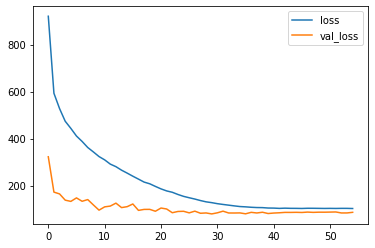

In [32]:
model_losses.plot()

#### Lower the val_loss, better are the results! Here we got a perfect behaviour of our model.

In [33]:
predictions = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

In [35]:
mean_absolute_error(y_test,predictions)
# Mean absolute error regression loss

7.012203757523868

In [36]:
np.sqrt(mean_squared_error(y_test,predictions))
# Mean squared error regression loss.

9.273070301707504

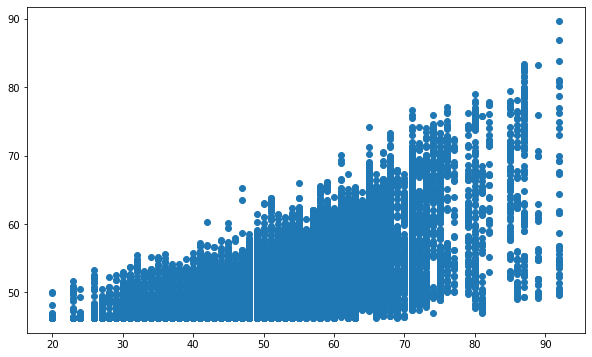

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)

In [38]:
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test

In [39]:
sample.head(10)

,Predict,Actual
0,47.197250,49.0
1,46.264263,47.0
2,46.270660,37.0
3,60.583206,63.0
4,51.556149,57.0
5,55.445324,59.0
6,46.984745,37.0
7,46.453808,47.0
8,50.913296,45.0
9,50.043526,56.0
